In [13]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split


In [14]:
# Load the Boston Housing dataset


# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
# Take a look at the data again
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# the predictor set of data is the inverse of test_size = .4)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)

print(X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)

((253, 13), (253,))
((253, 13), (253,))


In [16]:
# loan a linear regression mpdel
lm = linear_model.LinearRegression()

In [17]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#then we want to fit our model...i want you to take out lm, and fit it to our train data above...

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)



print "Score:", model.score(X_test, y_test)     

Score: 0.683869760045


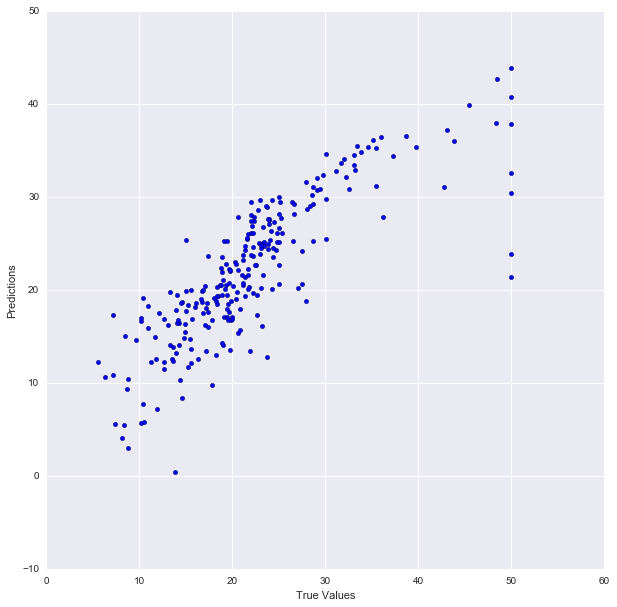

In [19]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [20]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [21]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]
Cross-Predicted Accuracy: 0.537671767736


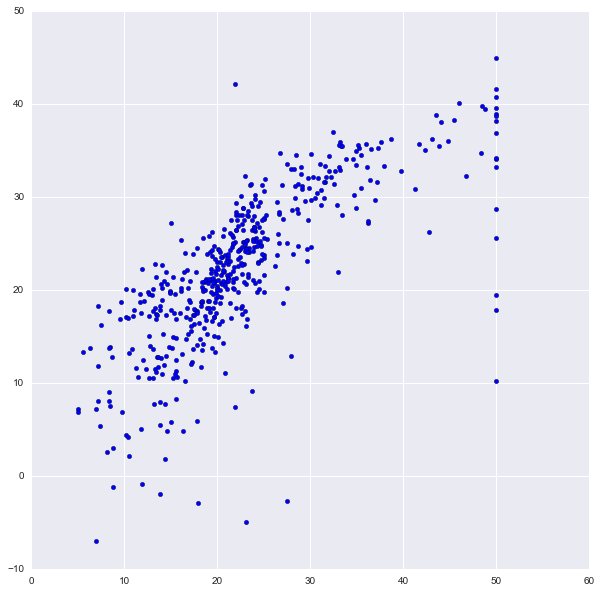

In [22]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-validated scores:", scores
print "Cross-Predicted Accuracy:", accuracy

In [23]:
fifty_fifty = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print np.std(fifty_fifty)

sixty_fourty = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)      
    sixty_fourty.append(model.score(x_test, y_test))
print np.std(sixty_fourty)

ninety_ten = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)     
    predictions = lm.predict(x_test)    
    ninety_ten.append(model.score(x_test, y_test))
print np.std(ninety_ten)

0.0457267477567
0.039423550691
0.0862294655967


In [124]:
xs = df[['TAX','CRIM', 'LSTAT', 'AGE','CHAS']]

In [125]:
xs.head()

,TAX,CRIM,LSTAT,AGE,CHAS
0,296.0,0.00632,4.98,65.2,0.0
1,242.0,0.02731,9.14,78.9,0.0
2,242.0,0.02729,4.03,61.1,0.0
3,222.0,0.03237,2.94,45.8,0.0
4,222.0,0.06905,5.33,54.2,0.0


In [128]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

(253, 5) (253,)
(253, 5) (253,)
Score: 0.501273770766


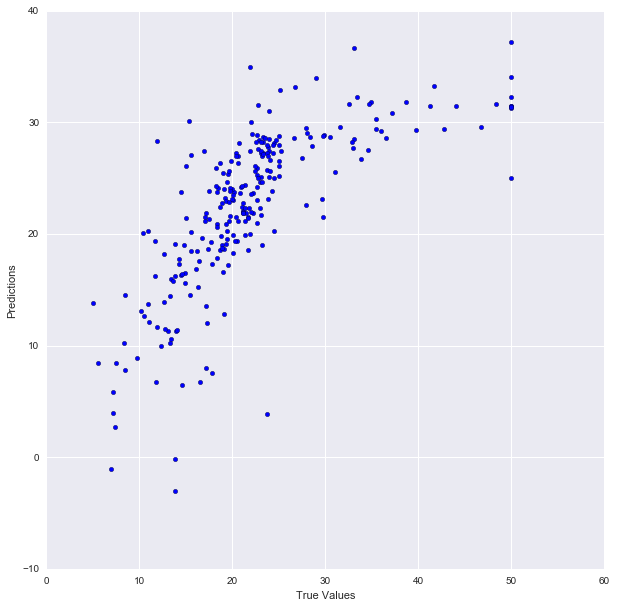

In [129]:
# X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

# ## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model_1.score(X_test, y_test)